In [1]:
import pandas as pd

C:\Users\Harsh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.shape 

(1095, 20)

In [5]:
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN


In [6]:
delivery.shape

(260920, 17)

In [7]:
delivery.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
335982    1         222
          2          82
335983    1         240
          2         207
335984    1         129
                   ... 
1426310   2         174
1426311   1         175
          2         139
1426312   1         113
          2         114
Name: total_runs, Length: 2217, dtype: int64

In [8]:
total_score = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [9]:
total_score = total_score[total_score["inning"]==1]

In [10]:
total_score

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [11]:
match.merge(total_score[['match_id','total_runs']],left_on ='id',right_on='match_id')

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [12]:
match_df =match.merge(total_score[['match_id','total_runs']],left_on ='id',right_on='match_id')

In [13]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [14]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [15]:
team =['Royal Challengers Bangalore',
       'Mumbai Indians', 
       'Kolkata Knight Riders',
       'Punjab Kings',
       'Rajasthan Royals',
       'Chennai Super Kings',
       'Sunrisers Hyderabad',
       'Delhi Capitals',
       'Lucknow Super Giants',
       'Gujarat Titans'
      ]

In [16]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [17]:
match_df = match_df[match_df['team1'].isin(team)]
match_df = match_df[match_df['team2'].isin(team)]

In [18]:
match_df.shape

(980, 22)

In [19]:
match_df['method'].value_counts()

method
D/L    17
Name: count, dtype: int64

In [20]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [21]:
match_df

,match_id,city,winner,total_runs
0,335982,Bangalore,Kolkata Knight Riders,222
1,335983,Chandigarh,Chennai Super Kings,240
2,335984,Delhi,Delhi Daredevils,129
3,335985,Mumbai,Royal Challengers Bangalore,165
4,335986,Kolkata,Kolkata Knight Riders,110
...,...,...,...,...
1090,1426307,Hyderabad,Sunrisers Hyderabad,214
1091,1426309,Ahmedabad,Kolkata Knight Riders,159
1092,1426310,Ahmedabad,Rajasthan Royals,172
1093,1426311,Chennai,Sunrisers Hyderabad,175


In [22]:
delivery_df=match_df.merge(delivery,on='match_id')

In [23]:
delivery_df= delivery_df[delivery_df['inning']==2]

In [24]:
delivery_df.shape

(112805, 20)

In [25]:
delivery_df['total_runs_y'].dtype

dtype('int64')

In [26]:
 (delivery_df.groupby('match_id')['total_runs_y'].cumsum())

124         1
125         2
126         2
127         3
128         4
         ... 
233896    110
233897    111
233898    112
233899    113
233900    114
Name: total_runs_y, Length: 112805, dtype: int64

In [27]:
delivery_df["current_score"] = (delivery_df.groupby('match_id')['total_runs_y'].cumsum())

In [28]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
233897,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
233898,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
233899,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [29]:
delivery_df['runs_left'] = (delivery_df['total_runs_x'] - delivery_df["current_score"])

delivery_df['runs_left'] = delivery_df['runs_left'].clip(lower=0)


In [30]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,110,3
233897,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,111,2
233898,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,112,1
233899,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,113,0


In [31]:
delivery_df['balls_left'] = 120 - (delivery_df.groupby(['match_id', 'inning']).cumcount() + 1)

delivery_df['balls_left'] = delivery_df['balls_left'].clip(lower=0)


In [32]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,3,57
233897,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,2,56
233898,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,1,55
233899,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,0,54


In [33]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].notna().astype(int)

delivery_df['wickets'] = (10 - delivery_df.groupby(['match_id', 'inning'])['player_dismissed'].cumsum()).clip(0, 10)


In [34]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
233896,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,3,57,8
233897,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,2,56,8
233898,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,1,55,8
233899,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,0,54,8
233900,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,1,NaN,0,0,NaN,NaN,114,0,53,8


In [35]:
#crr = runs/over
delivery_df['crr']=(delivery_df['current_score']*6)/(120- delivery_df['balls_left'])

In [36]:
#rrr
delivery_df['rrr']= (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [37]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,221,119,10,6.000000,11.142857
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,220,118,10,6.000000,11.186441
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,220,117,10,4.000000,11.282051
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,219,116,10,4.500000,11.327586
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,218,115,10,4.800000,11.373913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,0,NaN,NaN,110,3,57,8,10.476190,0.315789
233897,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,0,NaN,NaN,111,2,56,8,10.406250,0.214286
233898,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,0,NaN,NaN,112,1,55,8,10.338462,0.109091
233899,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,0,NaN,NaN,113,0,54,8,10.272727,0.000000


In [38]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0


In [39]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [40]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,1,221,119,10,6.000000,11.142857,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,2,220,118,10,6.000000,11.186441,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,2,220,117,10,4.000000,11.282051,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,3,219,116,10,4.500000,11.327586,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,4,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,NaN,NaN,110,3,57,8,10.476190,0.315789,1
233897,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,NaN,NaN,111,2,56,8,10.406250,0.214286,1
233898,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,NaN,NaN,112,1,55,8,10.338462,0.109091,1
233899,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,NaN,NaN,113,0,54,8,10.272727,0.000000,1


In [41]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left', 'balls_left','wickets','total_runs_x','crr','rrr','result']]

In [42]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,222,6.000000,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.000000,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,222,4.000000,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,222,4.500000,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,222,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...
233896,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,57,8,113,10.476190,0.315789,1
233897,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,56,8,113,10.406250,0.214286,1
233898,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,55,8,113,10.338462,0.109091,1
233899,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,0,54,8,113,10.272727,0.000000,1


In [43]:
final_df=final_df.sample(final_df.shape[0])

In [44]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
136209,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,54,40,9,172,8.850000,8.100000,1
9797,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,123,101,10,154,9.789474,7.306931,1
189661,Sunrisers Hyderabad,Royal Challengers Bangalore,Mumbai,66,111,10,68,1.333333,3.567568,1
27505,Rajasthan Royals,Mumbai Indians,Mumbai,176,92,9,212,7.714286,11.478261,0
56453,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,3,21,8,124,7.333333,0.857143,1
...,...,...,...,...,...,...,...,...,...,...
152006,Chennai Super Kings,Mumbai Indians,Hyderabad,62,28,6,149,5.673913,13.285714,0
184539,Lucknow Super Giants,Delhi Capitals,Mumbai,145,114,10,149,4.000000,7.631579,1
5467,Delhi Daredevils,Mumbai Indians,Mumbai,43,21,4,162,7.212121,12.285714,0
160605,Sunrisers Hyderabad,Kolkata Knight Riders,Abu Dhabi,93,63,7,163,7.368421,8.857143,0


In [45]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city            6012
runs_left          0
balls_left         0
wickets            0
total_runs_x       0
crr                0
rrr              284
result             0
dtype: int64

In [46]:
final_df.dropna(inplace=True)

In [47]:
final_df= final_df[final_df['balls_left'] != 0]

In [48]:
X= final_df.iloc[:,:-1]
y= final_df['result']

In [49]:
import sklearn
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
28728,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,177,99,10,203,7.428571,10.727273
126002,Royal Challengers Bangalore,Rajasthan Royals,Bengaluru,29,1,4,217,9.478992,174.000000
125719,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,41,37,7,138,7.012048,6.648649
167317,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,41,12,6,187,8.111111,20.500000
214570,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,68,39,10,186,8.740741,10.461538
...,...,...,...,...,...,...,...,...,...
52695,Mumbai Indians,Chennai Super Kings,Chennai,28,52,7,112,7.411765,3.230769
222385,Punjab Kings,Sunrisers Hyderabad,Mohali,96,46,6,182,6.972973,12.521739
17019,Rajasthan Royals,Delhi Daredevils,Centurion,137,110,10,143,3.600000,7.472727
124912,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,141,117,10,147,12.000000,7.230769


In [52]:
y_train

28728     1
126002    0
125719    1
167317    0
214570    1
         ..
52695     1
222385    0
17019     1
124912    1
182454    1
Name: result, Length: 83369, dtype: int64

In [53]:
import sklearn
print(sklearn.__version__)
#< 1.2 → sparse

#>= 1.2 → sparse_output

1.8.0


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [55]:
trf = ColumnTransformer(
    [('trf', OneHotEncoder(sparse_output=False, drop='first'),
      ['batting_team','bowling_team','city'])],
    remainder='passthrough'
)

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [58]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,83369.000000,83369.000000,83369.000000,83369.000000,83369.000000,83369.000000
mean,95.517782,62.357843,7.604109,168.312598,7.377701,11.659072
std,50.180650,33.557750,2.076044,30.817592,2.316637,15.755680
min,0.000000,1.000000,0.000000,62.000000,0.000000,0.000000
25%,56.000000,34.000000,6.000000,148.000000,6.171429,7.500000
50%,94.000000,63.000000,8.000000,168.000000,7.395349,9.241379
75%,133.000000,91.000000,9.000000,188.000000,8.608696,11.638554
max,286.000000,119.000000,10.000000,287.000000,36.000000,720.000000


In [59]:
pipe.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('step1', ...), ('step2', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('trf', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse 

In [60]:
y_pred = pipe.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [62]:
accuracy_score(y_test,y_pred) 

0.7982536103248092

In [63]:
precision_score(y_test,y_pred)

0.7990929705215419

In [64]:
recall_score(y_test,y_pred)

0.8157407407407408

In [65]:
f1_score(y_test,y_pred)

0.8073310423825888

# Random Forest Classifier

In [66]:
#from sklearn.ensemble import RandomForestClassifier

In [67]:
#pipe = Pipeline(steps=[
#    ('step1',trf),
    #('step2',RandomForestClassifier())
#])"""

In [68]:
#pipe.fit(X_train,y_train)"""

In [69]:
#y_pred1 = pipe.predict(X_test)"""

In [70]:
#accuracy_score(y_test,y_pred1)

In [71]:
#precision_score(y_test,y_pred1)

In [72]:
#recall_score(y_test,y_pred1)

In [73]:
#f1_score(y_test,y_pred1)

# decision Tree 

In [74]:
#from sklearn.tree import DecisionTreeClassifier

In [75]:
'''pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])'''

"pipe = Pipeline(steps=[\n    ('step1',trf),\n    ('step2',DecisionTreeClassifier())\n])"

In [76]:
#pipe.fit(X_train,y_train)

In [77]:
#y_pred2 = pipe.predict(X_test)

In [78]:
#accuracy_score(y_test,y_pred2)

In [79]:
#precision_score(y_test,y_pred2)

In [80]:
#recall_score(y_test,y_pred2)

In [81]:
#f1_score(y_test,y_pred2)

In [82]:
"""final_data=pd.DataFrame({'Models':['LR','RF','DT'],"ACC":[accuracy_score(y_test,y_pred)*100,
                                              accuracy_score(y_test,y_pred1)*100,
                                              accuracy_score(y_test,y_pred2)*100
                                              ]})"""

'final_data=pd.DataFrame({\'Models\':[\'LR\',\'RF\',\'DT\'],"ACC":[accuracy_score(y_test,y_pred)*100,\n                                              accuracy_score(y_test,y_pred1)*100,\n                                              accuracy_score(y_test,y_pred2)*100\n                                              ]})'

In [83]:
#final_data

In [84]:
'''import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\nplt.figure(figsize=(8,5))\nsns.barplot(x=\'Models\', y=\'ACC\', data=final_data)\nplt.title("Model Accuracy Comparison")\nplt.ylabel("Accuracy")\nplt.xlabel("Models")\nplt.show()'

In [85]:
print("Unique match ids count:", delivery_df['match_id'].nunique())
print("First 20 match ids:", delivery_df['match_id'].unique()[:20])
print("Does 74 exist?:", 74 in delivery_df['match_id'].unique())


Unique match ids count: 978
First 20 match ids: [335982 335983 335984 335985 335986 335987 335988 335989 335990 335991
 335992 335993 335994 335995 335996 335997 335998 335999 336000 336001]
Does 74 exist?: False


In [86]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [87]:
import numpy as np

In [88]:

def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [89]:
temp_df,target = match_progression(delivery_df,335999,pipe)
temp_df

Target- 164


,end_of_over,runs_after_over,wickets_in_over,lose,win
4149,1,11,0,26.6,73.4
4155,2,6,0,26.4,73.6
4161,3,11,0,19.7,80.3
4167,4,5,0,19.9,80.1
4173,5,4,0,21.0,79.0
4179,6,4,1,33.7,66.3
4185,7,5,1,47.6,52.4
4192,8,9,0,42.7,57.3
4198,9,12,0,32.6,67.4
4204,10,10,0,26.2,73.8


Text(0.5, 1.0, 'Target-164')

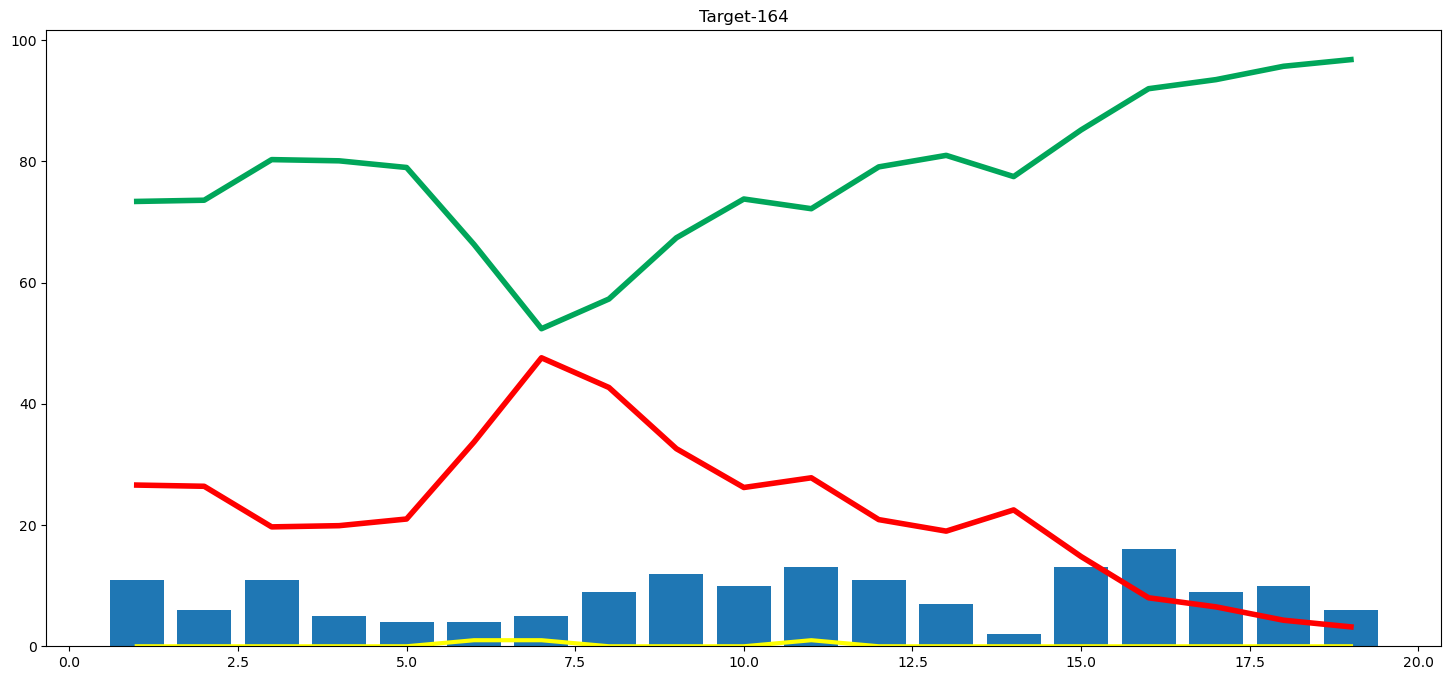

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [91]:
team

['Royal Challengers Bangalore',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [92]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [93]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [94]:
#pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [95]:
import sklearn
print(sklearn.__version__)


1.8.0
